In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

def u(t:float, x:float) -> float:
    return math.sin(2*math.pi*x)*math.cos(math.pi*t)+2.5*math.pi*x

def c(t:float, x:float) -> float: # c>=0 for 0<x<0.5, c<0 for 0.5<=x<=1.0
    return math.sin(2*math.pi*x)*math.sin(math.pi*t)/(2*math.cos(2*math.pi*x)*math.cos(math.pi*t)+2.5)

np.set_printoptions(precision=3)

In [3]:
arr_err_2d=[]
arr_err_2d_half=[]
arr_tau_h=[]
N = 100
for iterator in range(3,N+5):
    n_count = iterator
    i_count = iterator
    h_x = 1/(n_count-1)
    h_t = 1/(i_count-1)
    x = [h_x * n for n in range(n_count)]
    t = [h_t * i for i in range(i_count)]
    
    U = np.zeros((i_count, n_count))
    for i in range(i_count):
        U[i, 0] = u(t[i], 0)
    for n in range (n_count):
        U[0, n] = u(0, x[n])

    
    for i in range(1, i_count):
        for n in range(1, n_count):
            cur_c=c(t[i], x[n])
            
# тут собстенно, прописана одна из явных реализаций, можно их менять, пробовать
#         U[i,n]=(cur_c*h_t*U[i, n-1]+h_x*U[i-1, n])/(h_x+cur_c*h_t)
        U[i,n]=U[i,n-1]*(1-h_x/(h_x+cur_c*h_t)) + U[i-1,n]*(1-cur_c*h_t/(h_x+cur_c*h_t))
#         if x[n]<=0.5:
#             U[i,n]=(cur_c*h_t*U[i, n-1]+h_x*U[i-1, n])/(h_x+cur_c*h_t)
#         else:
#         U[i,n]=U[i,n-1]*(1+h_x/(h_t*cur_c))+U[i-1,n-1]*(h_x/(h_t*cur_c))
            
    max_err=0
    max_err_half=0
    for i in range(i_count):        
        u_x = [u(t[i], h_x * n) for n in range(n_count)]
        max_err=max(max_err, max([abs(U[i, n] - u_x[n]) for n in range(n_count)]))
        max_err_half=max(max_err_half, max([abs(U[i, n] - u_x[n]) for n in range(n_count//2)]))
    
    arr_tau_h.append(2*h_t)
    arr_err_2d.append(max_err)
    arr_err_2d_half.append(max_err_half)
# print(arr_tau_h)
# print(arr_err_2d)
# print(arr_err_2d_half)

In [71]:
plt.legend?

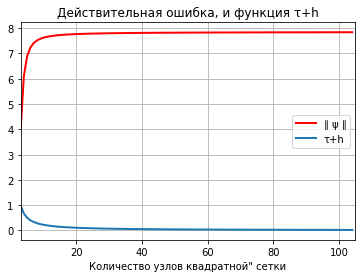

In [8]:
fig = plt.figure()
plt.xlim([3,105])
# plt.ylim([0,1.4])
plt.title('Действительная ошибка, и функция τ+h')
plt.xlabel('Количество узлов квадратной" сетки')
plt.plot([it for it in range(3, N+5)], arr_err_2d, marker='None', color='r', markersize=10, linewidth=2, label='∥ ψ ∥')
plt.plot([it for it in range(3, N+5)], arr_tau_h, marker='None', markersize=10, linewidth=2, label='τ+h')
# plt.plot([0,200], [0,0], '--', color='grey', linewidth=1,)
# plt.plot([it for it in range(5, N+5)], arr_err_2d_half, marker='None', markersize=10, linewidth=2, label='error')
plt.legend()
plt.savefig(str(1).zfill(2)+'.jpg')
plt.grid(True)

# plt.plot([it for it in range(5, N+5)], [arr_err_2d_half[it]/arr_tau_h[it] for it in range(N)], '--', marker='None', markersize=10, linewidth=2)
# plt.plot([it for it in range(5, N+5)], [arr_err_2d[it]/arr_tau_h[it] for it in range(N)], '--', marker='None', markersize=10, linewidth=2)


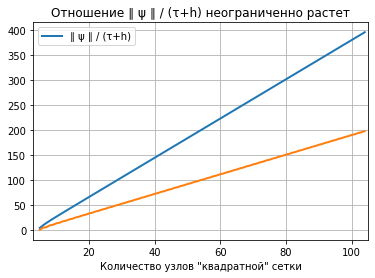

In [6]:
plt.figure()
plt.xlim([3,105])
plt.title('Отношение ∥ ψ ∥ / (τ+h) неограниченно растет')
plt.xlabel('Количество узлов "квадратной" сетки')
plt.plot([it for it in range(5, N+5)], [arr_err_2d[it]/arr_tau_h[it] for it in range(N)], linewidth=2, label='∥ ψ ∥ / (τ+h)')
plt.plot([it for it in range(5, N+5)], [arr_err_2d_half[it]/arr_tau_h[it] for it in range(N)], marker='None', markersize=10, linewidth=2)
plt.legend()
plt.savefig(str(2).zfill(2)+'.jpg')
plt.grid(True)